In [1]:
!pip install pycaret pandas

In [78]:
from pycaret.regression import RegressionExperiment
import pandas as pd
data = pd.read_csv(r'C:\Users\ASUS\Desktop\projectforecastpm2_5\dataforecast\cleandata_hours_test.csv')
data['timestamp'] = pd.to_datetime(data['timestamp'])
print(data.dtypes)
data

timestamp      datetime64[ns]
humidity              float64
pm_2_5                float64
temperature           float64
pm_2_5_Lag1           float64
pm_2_5_Lag2           float64
pm_2_5_Lag3           float64
dtype: object


,timestamp,humidity,pm_2_5,temperature,pm_2_5_Lag1,pm_2_5_Lag2,pm_2_5_Lag3
0,2021-08-18 00:00:00,82.810924,6.478261,27.261345,6.532468,9.037037,8.862069
1,2021-08-18 01:00:00,84.977966,14.271186,26.650000,6.478261,6.532468,9.037037
2,2021-08-18 02:00:00,84.600000,32.308333,26.710924,14.271186,6.478261,6.532468
3,2021-08-18 03:00:00,85.113559,29.743590,26.647458,32.308333,14.271186,6.478261
4,2021-08-18 04:00:00,85.430833,38.931034,26.551667,29.743590,32.308333,14.271186
...,...,...,...,...,...,...,...
25531,2025-02-03 19:00:00,70.578723,28.591667,29.206171,24.445378,28.166667,29.669565
25532,2025-02-03 20:00:00,69.189982,29.714286,28.579493,28.591667,24.445378,28.166667
25533,2025-02-03 21:00:00,72.229974,22.954545,27.387404,29.714286,28.591667,24.445378
25534,2025-02-03 22:00:00,74.487035,21.478992,26.806460,22.954545,29.714286,28.591667


In [79]:
s = RegressionExperiment()
s.setup(data, target = 'pm_2_5', session_id = 123) # ตั้งค่า setup parameter

,Description,Value
0,Session id,123
1,Target,pm_2_5
2,Target type,Regression
3,Original data shape,"(25536, 7)"
4,Transformed data shape,"(25536, 9)"
5,Transformed train set shape,"(17875, 9)"
6,Transformed test set shape,"(7661, 9)"
7,Numeric features,5
8,Date features,1
9,Preprocess,True


In [83]:
best_model = s.compare_models()




,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,3.3178,23.0990,4.8039,0.8452,0.2900,0.3266,0.3870
rf,Random Forest Regressor,3.3812,24.4612,4.9437,0.8361,0.2981,0.3020,1.1310
et,Extra Trees Regressor,3.4395,24.4987,4.9479,0.8358,0.2979,0.3100,0.5680
gbr,Gradient Boosting Regressor,3.6664,27.6537,5.2572,0.8147,0.3149,0.4225,0.4530
knn,K Neighbors Regressor,4.0804,35.3011,5.9394,0.7634,0.3363,0.3690,0.0290
lr,Linear Regression,4.1107,36.3170,6.0249,0.7567,0.3438,0.6420,0.6620
ridge,Ridge Regression,4.1107,36.3170,6.0249,0.7567,0.3438,0.6420,0.0170
br,Bayesian Ridge,4.1107,36.3170,6.0249,0.7567,0.3438,0.6424,0.0160
lar,Least Angle Regression,4.1220,36.5113,6.0405,0.7555,0.3447,0.6569,0.0140
en,Elastic Net,4.1216,36.5827,6.0470,0.7550,0.3472,0.6764,0.0150


In [ ]:
s.evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [85]:
predict_test_data =  s.predict_model(best_model)
predict_test_data

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,3.2752,22.6673,4.7610,0.8531,0.2790,0.3164


,timestamp,humidity,temperature,pm_2_5_Lag1,pm_2_5_Lag2,pm_2_5_Lag3,pm_2_5,prediction_label
24154,2024-12-05 10:00:00,91.153580,25.988838,21.138710,21.138710,21.138710,49.308334,29.453103
3134,2022-04-10 14:00:00,83.742844,28.054708,21.138710,35.114754,32.314816,21.138710,21.205984
1091,2021-10-17 11:00:00,76.608887,29.959999,17.463333,18.226667,18.549383,9.471358,17.302293
12019,2023-05-27 19:00:00,100.000000,29.512606,10.950413,9.338710,7.603306,9.747899,12.369648
18044,2024-03-08 20:00:00,66.669739,30.807867,28.638655,25.116667,24.347221,31.094828,29.011834
...,...,...,...,...,...,...,...,...
20723,2024-07-08 11:00:00,67.829231,31.275221,16.375000,19.508333,28.142857,13.341666,13.785050
12480,2023-06-16 00:00:00,100.000000,28.018908,20.950413,20.218487,18.858334,16.067226,20.422587
23506,2024-11-04 10:00:00,86.567444,26.978313,12.714286,22.000000,19.691668,13.108334,12.148485
10760,2023-04-05 08:00:00,100.000000,28.176250,49.393162,34.674999,37.270832,43.825001,48.100735


In [86]:
print("predict testset")
predict_test_data[['pm_2_5','prediction_label']] # predict testset

predict testset


,pm_2_5,prediction_label
24154,49.308334,29.453103
3134,21.138710,21.205984
1091,9.471358,17.302293
12019,9.747899,12.369648
18044,31.094828,29.011834
...,...,...
20723,13.341666,13.785050
12480,16.067226,20.422587
23506,13.108334,12.148485
10760,43.825001,48.100735


In [87]:
new_data = data.copy().drop(['pm_2_5'], axis=1)
predictions = s.predict_model(best_model,data = new_data)
print("****predict_alldata****")
predictions

****predict_alldata****


,timestamp,humidity,temperature,pm_2_5_Lag1,pm_2_5_Lag2,pm_2_5_Lag3,prediction_label
0,2021-08-18 00:00:00,82.810921,27.261345,6.532467,9.037037,8.862069,8.324260
1,2021-08-18 01:00:00,84.977966,26.650000,6.478261,6.532467,9.037037,9.003287
2,2021-08-18 02:00:00,84.599998,26.710924,14.271187,6.478261,6.532467,17.532973
3,2021-08-18 03:00:00,85.113556,26.647457,32.308334,14.271187,6.478261,29.918334
4,2021-08-18 04:00:00,85.430832,26.551666,29.743589,32.308334,14.271187,29.067251
...,...,...,...,...,...,...,...
25531,2025-02-03 19:00:00,70.578720,29.206171,24.445377,28.166666,29.669565,26.857626
25532,2025-02-03 20:00:00,69.189980,28.579493,28.591667,24.445377,28.166666,29.419499
25533,2025-02-03 21:00:00,72.229973,27.387405,29.714285,28.591667,24.445377,30.106800
25534,2025-02-03 22:00:00,74.487038,26.806459,22.954546,29.714285,28.591667,24.043777


<Figure size 2000x600 with 0 Axes>

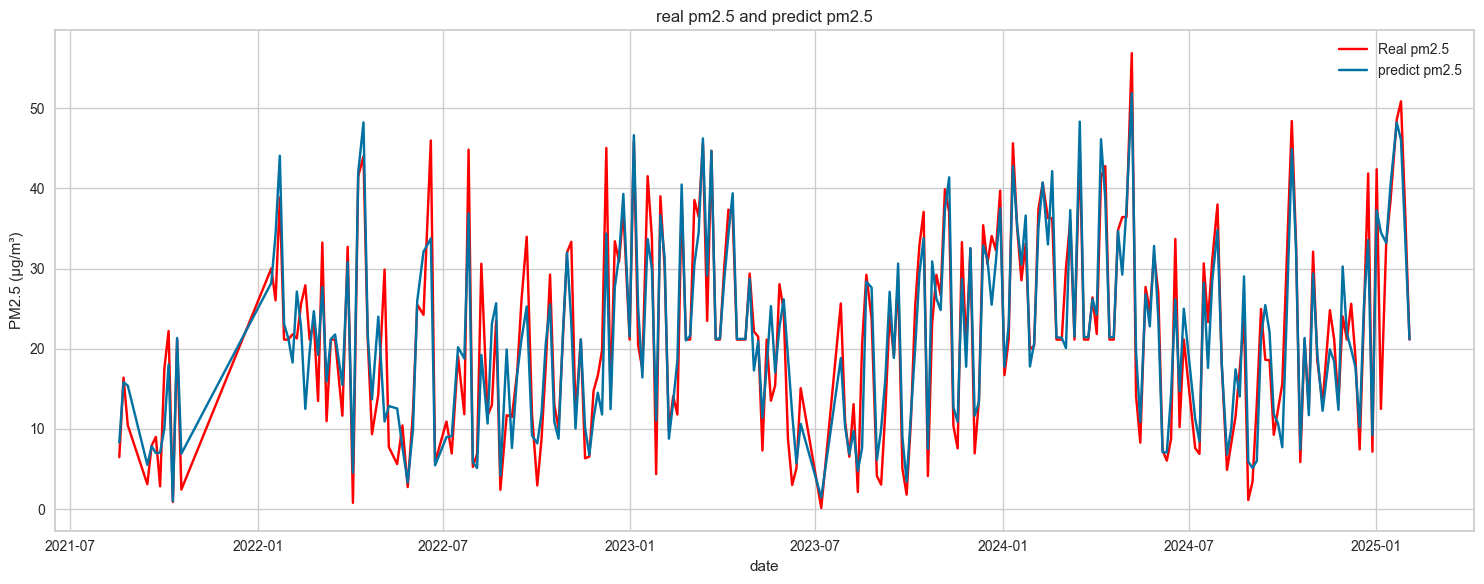

In [90]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 6))
sample_rate = 100  # แสดงทุกๆ 10 จุด


plt.figure(figsize=(15, 6))
plt.plot(data['timestamp'][::100], data['pm_2_5'][::100], label='Real pm2.5', color = 'red')
plt.plot(data['timestamp'][::100], predictions['prediction_label'][::100], label='predict pm2.5', marker='x')
plt.title('real pm2.5 and predict pm2.5')
plt.xlabel('date')
plt.ylabel('PM2.5 (µg/m³)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [93]:
from pycaret.regression import load_model, predict_model
from datetime import datetime, timedelta
import numpy as np

file_path = r"C:\Users\ASUS\Desktop\projectforecastpm2_5\dataforecast\cleandata_hours_test.csv"
df = pd.read_csv(file_path)
df['timestamp'] = pd.to_datetime(df['timestamp'])
# Load the trained model
model = load_model(r'C:\Users\ASUS\Desktop\projectforecastpm2_5\models\best_model')
np.random.seed(42)
current_data = df.copy()
def forecast_next_7_days(model, last_data):
    last_date = last_data['timestamp'].max()
    future_hours = [last_date + timedelta(hours=i+1) for i in range(7* 24)]  # 7 days * 24 hours
    
    future_data = []
    current_data = last_data.copy()
    
    for future_hour in future_hours:
        new_row = {'timestamp': future_hour}
        
        # Calculate mean temperature and humidity from recent data
        temp_mean = current_data['temperature'].tail(24).mean()
        humidity_mean = current_data['humidity'].tail(24).mean()
        
        # Generate temperature and humidity using normal distribution
        new_row['temperature'] = np.random.normal(temp_mean, 2)
        new_row['humidity'] = np.clip(np.random.normal(humidity_mean, 5), 0, 100)
        
        # Create Lag Features for PM2.5
        for lag in range(1, 4):
            if len(current_data) >= lag:
                new_row[f'pm_2_5_Lag{lag}'] = current_data['pm_2_5'].iloc[-lag]
            else:
                new_row[f'pm_2_5_Lag{lag}'] = current_data['pm_2_5'].mean()
        
        # Predict PM2.5 for this hour
        new_df = pd.DataFrame([new_row])
        prediction = predict_model(model, data=new_df)
        
        new_row['pm_2_5'] = prediction['prediction_label'].iloc[0]
        future_data.append(new_row)
        
        # Add predicted data to current_data for next hour prediction
        current_data = pd.concat([current_data, pd.DataFrame([new_row])], ignore_index=True)
    
    return pd.DataFrame(future_data)

# Generate forecast data
forecast_data = forecast_next_7_days(model, df)

Transformation Pipeline and Model Successfully Loaded


In [94]:
current_data['pm_2_5'].iloc[-1]

17.225

PM2.5 forecast results 7 days in advance:
    วันที่  ค่า PM2.5 (µg/m³)  อุณหภูมิ (°C)  ความชื้น (%)
2025-02-04          19.060791      30.093447     73.104607
2025-02-04          22.014424      30.480343     80.967818
2025-02-04          25.239099      28.936020     72.357098
2025-02-04          27.056934      32.599473     76.890550
2025-02-04          28.901511      28.691464     75.480664
2025-02-04          30.387694      28.730109     70.094958
2025-02-04          31.521516      30.169010     62.288543
2025-02-04          32.555515      26.323346     68.149578
2025-02-04          33.016675      27.675379     71.882532
2025-02-04          33.160532      27.869188     62.755597
2025-02-04          32.864289      32.608804     67.813766
2025-02-04          32.882765      30.002316     61.155195
2025-02-04          32.846644      28.859645     67.892396
2025-02-04          33.338055      27.496371     69.862067
2025-02-04          33.004617      28.361488     67.342247
2025-02-04    

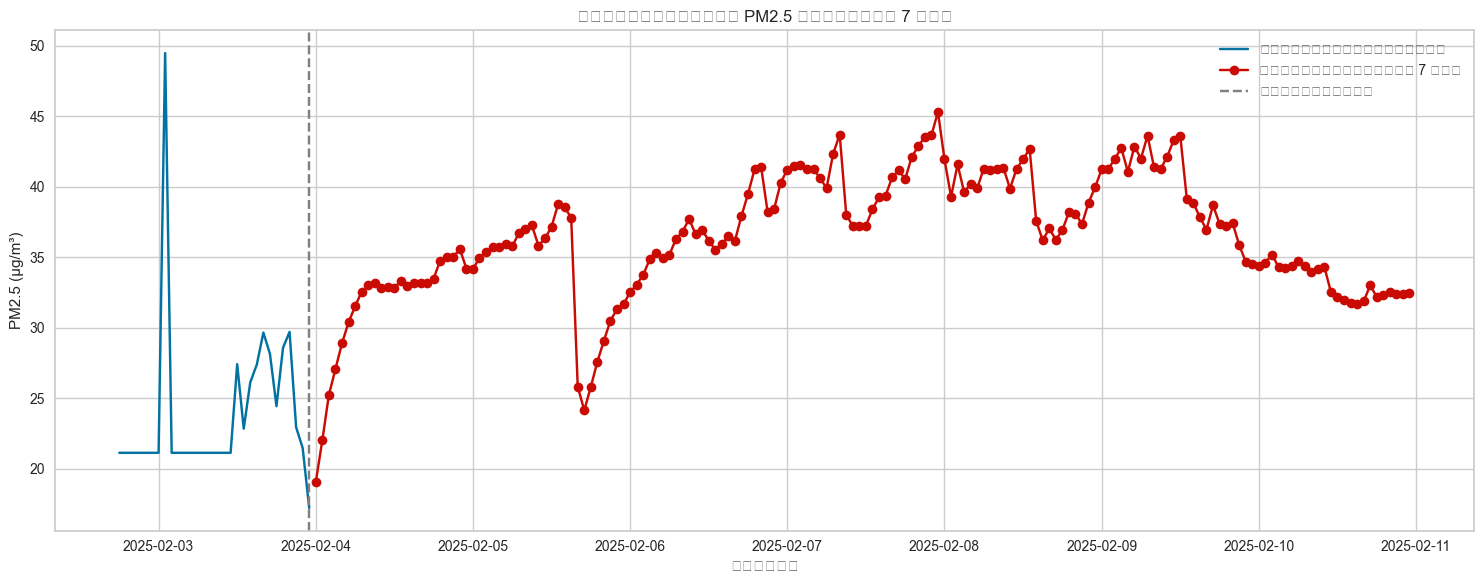

In [95]:

# แสดงผลการพยากรณ์
print("PM2.5 forecast results 7 days in advance:") #  result of predict 
forecast_display = forecast_data[['timestamp', 'pm_2_5', 'temperature', 'humidity']].copy()
forecast_display['timestamp'] = forecast_display['timestamp'].dt.strftime('%Y-%m-%d')
forecast_display = forecast_display.rename(columns={
    'timestamp': 'วันที่', 
    'pm_2_5': 'ค่า PM2.5 (µg/m³)', 
    'temperature': 'อุณหภูมิ (°C)',
    'humidity': 'ความชื้น (%)'
})
print(forecast_display.to_string(index=False))

# สร้างกราฟแสดงผลการพยากรณ์ล่วงหน้า
plt.figure(figsize=(15, 6))
# แสดงข้อมูลจริง 30 วันล่าสุด
plt.plot(data['timestamp'].tail(30), data['pm_2_5'].tail(30), 'b-', label='ข้อมูลจริงย้อนหลัง')
# แสดงข้อมูลที่พยากรณ์ล่วงหน้า 7 วัน
plt.plot(forecast_data['timestamp'], forecast_data['pm_2_5'], 'r-o', label='พยากรณ์ล่วงหน้า 7 วัน')
plt.axvline(x=data['timestamp'].max(), color='gray', linestyle='--', label='วันปัจจุบัน')
plt.title('การพยากรณ์ค่า PM2.5 ล่วงหน้า 7 วัน')
plt.xlabel('วันที่')
plt.ylabel('PM2.5 (µg/m³)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [89]:
s.save_model(best_model, r'C:\Users\ASUS\Desktop\projectforecastpm2_5\models\best_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('date_feature_extractor',
                  TransformerWrapper(include=['timestamp'],
                                     transformer=ExtractDateTimeFeatures())),
                 ('numerical_imputer',
                  TransformerWrapper(include=['humidity', 'temperature',
                                              'pm_2_5_Lag1', 'pm_2_5_Lag2',
                                              'pm_2_5_Lag3'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('trained_model', LGBMRegressor(n_jobs=-1, random_state=123))]),
 'C:\\Users\\ASUS\\Desktop\\projectforecastpm2_5\\models\\best_model.pkl')

In [96]:
print(data.dtypes)
print(df.dtypes)

timestamp      datetime64[ns]
humidity              float64
pm_2_5                float64
temperature           float64
pm_2_5_Lag1           float64
pm_2_5_Lag2           float64
pm_2_5_Lag3           float64
dtype: object
timestamp      datetime64[ns]
humidity              float64
pm_2_5                float64
temperature           float64
pm_2_5_Lag1           float64
pm_2_5_Lag2           float64
pm_2_5_Lag3           float64
dtype: object


<Figure size 2000x600 with 0 Axes>

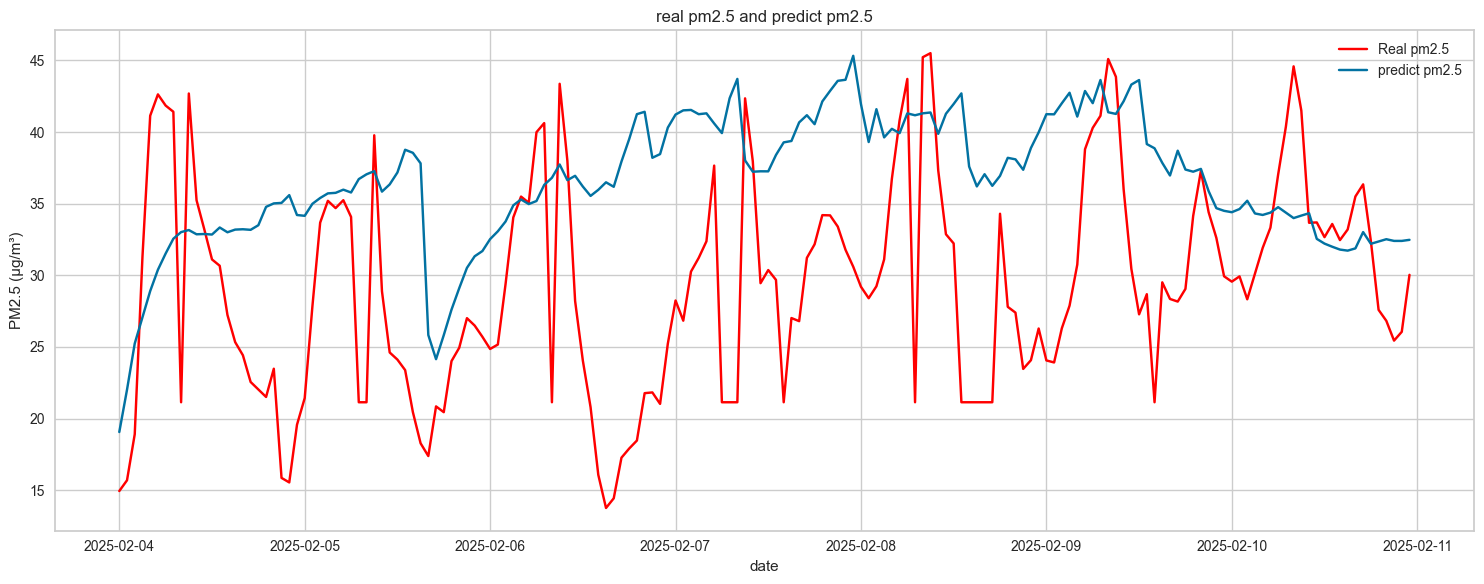

In [97]:
import matplotlib.pyplot as plt
data2 = pd.read_csv(r'C:\Users\ASUS\Desktop\projectforecastpm2_5\dataforecast\cleandata_hours.csv')
data2['timestamp'] = pd.to_datetime(data2['timestamp'])

plt.figure(figsize=(20, 6))
# sample_rate = 100  # แสดงทุกๆ 10 จุด
data2 = data2.iloc[-168:].copy()
data2 = data2.reset_index(drop=True)
plt.figure(figsize=(15, 6))
plt.plot(data2['timestamp'], data2['pm_2_5'], label='Real pm2.5', color = 'red')
plt.plot(forecast_data['timestamp'], forecast_data['pm_2_5'], label='predict pm2.5', marker='x')
plt.title('real pm2.5 and predict pm2.5')
plt.xlabel('date')
plt.ylabel('PM2.5 (µg/m³)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [108]:
from pycaret.regression import load_model, predict_model
from datetime import datetime, timedelta
import numpy as np
import pandas as pd

file_path = r"C:\Users\ASUS\Desktop\projectforecastpm2_5\dataforecast\cleandata_hours_test.csv"
df = pd.read_csv(file_path)
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Load the trained model
model = load_model(r'C:\Users\ASUS\Desktop\projectforecastpm2_5\models\best_model')
np.random.seed(42)

def forecast_next_7_days(model, last_data, external_data):
    last_date = last_data['timestamp'].max()
    future_hours = [last_date + timedelta(hours=i+1) for i in range(7 * 24)]  # 7 days * 24 hours
    future_data = []
    current_data = last_data.copy()
    
    for future_hour in future_hours:
        new_row = {'timestamp': future_hour}
        
        # ใช้ค่า temperature และ humidity จาก external_data
        if future_hour in external_data['timestamp'].values:
            matched_row = external_data[external_data['timestamp'] == future_hour].iloc[0]
            new_row['temperature'] = matched_row['temperature']
            new_row['humidity'] = matched_row['humidity']
        else:
            new_row['temperature'] = current_data['temperature'].iloc[-1]  # ใช้ค่าล่าสุดที่มี
            new_row['humidity'] = current_data['humidity'].iloc[-1]
        
        # Create Lag Features for PM2.5
        for lag in range(1, 4):
            if len(current_data) >= lag:
                new_row[f'pm_2_5_Lag{lag}'] = current_data['pm_2_5'].iloc[-lag]
            else:
                new_row[f'pm_2_5_Lag{lag}'] = current_data['pm_2_5'].mean()
        
        # Predict PM2.5 for this hour
        new_df = pd.DataFrame([new_row])
        prediction = predict_model(model, data=new_df)
        new_row['pm_2_5'] = prediction['prediction_label'].iloc[0]
        future_data.append(new_row)
        
        # Add predicted data to current_data for next hour prediction
        current_data = pd.concat([current_data, pd.DataFrame([new_row])], ignore_index=True)
    
    return pd.DataFrame(future_data)

# โหลด external data ที่มีค่า temperature และ humidity
external_file_path = r"C:\Users\ASUS\Desktop\projectforecastpm2_5\dataforecast\cleandata_hours.csv"
external_data = pd.read_csv(external_file_path)
external_data['timestamp'] = pd.to_datetime(external_data['timestamp'])

# Generate forecast data
forecast_data = forecast_next_7_days(model, df, external_data)
forecast_data

Transformation Pipeline and Model Successfully Loaded


,timestamp,temperature,humidity,pm_2_5_Lag1,pm_2_5_Lag2,pm_2_5_Lag3,pm_2_5
0,2025-02-04 00:00:00,25.794946,75.480921,17.225000,21.478992,22.954545,20.326797
1,2025-02-04 01:00:00,25.554351,75.151995,20.326797,17.225000,21.478992,25.603465
2,2025-02-04 02:00:00,24.923516,77.632531,25.603465,20.326797,17.225000,27.937113
3,2025-02-04 03:00:00,24.127439,81.569758,27.937113,25.603465,20.326797,31.991223
4,2025-02-04 04:00:00,23.320383,86.182408,31.991223,27.937113,25.603465,34.838234
...,...,...,...,...,...,...,...
163,2025-02-10 19:00:00,28.891425,69.219469,30.167486,29.150198,28.709535,30.474237
164,2025-02-10 20:00:00,28.379455,70.651656,30.474237,30.167486,29.150198,30.891211
165,2025-02-10 21:00:00,27.974364,71.649910,30.891211,30.474237,30.167486,30.433376
166,2025-02-10 22:00:00,27.943536,71.973936,30.433376,30.891211,30.474237,30.783797


In [109]:
import matplotlib.pyplot as plt
data2 = pd.read_csv(r'C:\Users\ASUS\Desktop\projectforecastpm2_5\dataforecast\cleandata_hours.csv')
data2['timestamp'] = pd.to_datetime(data2['timestamp'])

plt.figure(figsize=(20, 6))
# sample_rate = 100  # แสดงทุกๆ 10 จุด
data2 = data2.iloc[-168:].copy()
data2 = data2.reset_index(drop=True)
# plt.figure(figsize=(15, 6))
# plt.plot(data2['timestamp'], data2['pm_2_5'], label='Real pm2.5', color = 'red')
# plt.plot(forecast_data['timestamp'], forecast_data['pm_2_5'], label='predict pm2.5', marker='x')
# plt.title('real pm2.5 and predict pm2.5')
# plt.xlabel('date')
# plt.ylabel('PM2.5 (µg/m³)')
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()


<Figure size 2000x600 with 0 Axes>

In [112]:
print("Actual PM2.5 values:")
data2




Actual PM2.5 values:


,timestamp,humidity,pm_2_5,temperature,pm_2_5_Lag1,pm_2_5_Lag2,pm_2_5_Lag3
0,2025-02-04 00:00:00,75.480921,14.941667,25.794946,17.225000,21.478992,22.954545
1,2025-02-04 01:00:00,75.151995,15.691667,25.554351,14.941667,17.225000,21.478992
2,2025-02-04 02:00:00,77.632531,18.907563,24.923516,15.691667,14.941667,17.225000
3,2025-02-04 03:00:00,81.569758,31.291667,24.127439,18.907563,15.691667,14.941667
4,2025-02-04 04:00:00,86.182408,41.141667,23.320383,31.291667,18.907563,15.691667
...,...,...,...,...,...,...,...
163,2025-02-10 19:00:00,69.219469,27.588235,28.891425,32.400000,36.350000,35.504202
164,2025-02-10 20:00:00,70.651656,26.825000,28.379455,27.588235,32.400000,36.350000
165,2025-02-10 21:00:00,71.649910,25.441667,27.974364,26.825000,27.588235,32.400000
166,2025-02-10 22:00:00,71.973936,26.056075,27.943536,25.441667,26.825000,27.588235


In [113]:
print("\nPredicted PM2.5 values:")
forecast_data


Predicted PM2.5 values:


,timestamp,temperature,humidity,pm_2_5_Lag1,pm_2_5_Lag2,pm_2_5_Lag3,pm_2_5
0,2025-02-04 00:00:00,25.794946,75.480921,17.225000,21.478992,22.954545,20.326797
1,2025-02-04 01:00:00,25.554351,75.151995,20.326797,17.225000,21.478992,25.603465
2,2025-02-04 02:00:00,24.923516,77.632531,25.603465,20.326797,17.225000,27.937113
3,2025-02-04 03:00:00,24.127439,81.569758,27.937113,25.603465,20.326797,31.991223
4,2025-02-04 04:00:00,23.320383,86.182408,31.991223,27.937113,25.603465,34.838234
...,...,...,...,...,...,...,...
163,2025-02-10 19:00:00,28.891425,69.219469,30.167486,29.150198,28.709535,30.474237
164,2025-02-10 20:00:00,28.379455,70.651656,30.474237,30.167486,29.150198,30.891211
165,2025-02-10 21:00:00,27.974364,71.649910,30.891211,30.474237,30.167486,30.433376
166,2025-02-10 22:00:00,27.943536,71.973936,30.433376,30.891211,30.474237,30.783797


In [100]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
merged_data = forecast_data.merge(external_data[['timestamp', 'pm_2_5']], on='timestamp', suffixes=('_predicted', '_actual'))
mae = mean_absolute_error(merged_data['pm_2_5_actual'], merged_data['pm_2_5_predicted'])
mse = mean_squared_error(merged_data['pm_2_5_actual'], merged_data['pm_2_5_predicted'])
rmse = np.sqrt(mse)
mape = np.mean(np.abs((merged_data['pm_2_5_actual'] - merged_data['pm_2_5_predicted']) / merged_data['pm_2_5_actual'])) * 100

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}%")

MAE: 6.171963036610358
MSE: 58.988925113595066
RMSE: 7.6804248003346185
MAPE: 24.61795693255697%
